In [59]:
from matplotlib import pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import pyarrow as pa

In [83]:
pd.read_csv('dog_traits_long.csv')

OSError: [Errno 22] Invalid argument: 'dog_traits_long.csv'

In [75]:
pd.read_parquet(path='..\Data\stock_df.parquet', engine='pyarrow')

FileNotFoundError: [Errno 2] No such file or directory: '..\\Data\\stock_df.parquet'

In [45]:
START_DATE = '2020-01-01'
END_DATE = '2022-09-30'
TICKERS = 'GOOGL MSFT TSLA'
stock_data = yf.download(TICKERS, START_DATE, END_DATE)

[*********************100%***********************]  3 of 3 completed


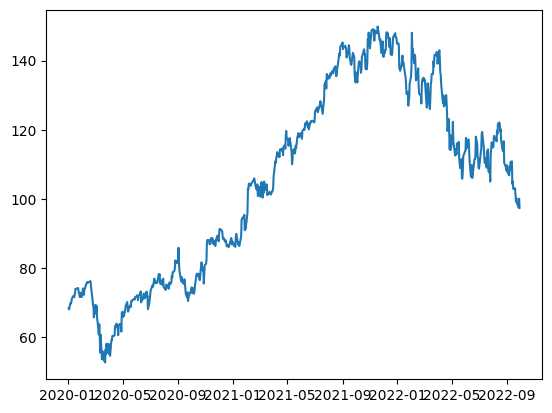

In [46]:
TICKER = 'GOOGL'
GOOGL = stock_data['Adj Close'].loc[START_DATE:END_DATE, TICKER]
plt.plot(GOOGL)

In [47]:
ret_df = pd.DataFrame(GOOGL.diff().dropna())
print('Avg. return: ', ret_df.mean())
print('Volatility: ', ret_df.std())
print('VaR99: ', np.abs(ret_df.quantile(.01)))
print('VaR95: ', np.abs(ret_df.quantile(.05)))

Avg. return:  GOOGL    0.041948
dtype: float64
Volatility:  GOOGL    2.099984
dtype: float64
VaR99:  GOOGL    5.518997
Name: 0.01, dtype: float64
VaR95:  GOOGL    3.753502
Name: 0.05, dtype: float64


In [48]:
stock_data.head(5)

Adj Close                             Close              \
                GOOGL        MSFT       TSLA      GOOGL        MSFT   
Date                                                                  
2019-12-31  66.969498  153.745239  27.888666  66.969498  157.699997   
2020-01-02  68.433998  156.592026  28.684000  68.433998  160.619995   
2020-01-03  68.075996  154.642136  29.534000  68.075996  158.619995   
2020-01-06  69.890503  155.041870  30.102667  69.890503  159.029999   
2020-01-07  69.755501  153.628265  31.270666  69.755501  157.580002   

                            High                               Low  \
                 TSLA      GOOGL        MSFT       TSLA      GOOGL   
Date                                                                 
2019-12-31  27.888666  67.032997  157.770004  28.086000  66.606499   
2020-01-02  28.684000  68.433998  160.729996  28.713333  67.324501   
2020-01-03  29.534000  68.687500  159.949997  30.266666  67.365997   
2020-01-06  30.102667  69.916000  159.100006  30.104000  67.550003   
2020-01-07  31.270666  70.175003  159.669998  31.441999  69.578003   

                                        Open                           Volume  \
                  MSFT       TSLA      GOOGL        MSFT       TSLA     GOOGL   
Date                                                                            
2019-12-31  156.449997  26.805332  66.789497  156.770004  27.000000  19514000   
2020-01-02  158.330002  28.114000  67.420502  158.779999  28.299999  27278000   
2020-01-03  158.059998  29.128000  67.400002  158.320007  29.366667  23408000   
2020-01-06  156.509995  29.333332  67.581497  157.080002  29.364668  46768000   
2020-01-07  157.320007  30.224001  70.023003  159.320007  30.760000  34330000   

                                 
                MSFT       TSLA  
Date                             
2019-12-31  18369400  154285500  
2020-01-02  22622100  142981500  
2020-01-03  21116200  266677500  
2020-01-06  20813700  151995000  
2020-01-07  21634100  268231500

In [56]:
stock_df = stock_data.stack().reset_index().rename(columns={'level_1': 'Ticker'})
stock_df.columns = stock_df.columns.str.replace(' ', '_')
stock_df.head()

,Date,Ticker,Adj_Close,Close,High,Low,Open,Volume
0,2022-09-28,GOOGL,100.050003,100.050003,100.699997,97.110001,97.650002,32466300
1,2022-09-28,MSFT,241.070007,241.070007,242.330002,234.729996,236.809998,29029700
2,2022-09-28,TSLA,287.809998,287.809998,289.000000,277.570007,283.079987,54664800
3,2022-09-29,GOOGL,97.419998,97.419998,98.639999,95.959999,98.639999,31047200
4,2022-09-29,MSFT,237.500000,237.500000,239.949997,234.410004,238.889999,27484200


In [58]:
stock_df.to_parquet('stock_df.parquet')

OSError: [Errno 22] Invalid argument: 'stock_df.parquet'

In [52]:
stock_df = pd.read_parquet('Data/stock_df.parquet').head()
stock_df.head()

OSError: [Errno 22] Invalid argument: 'Data/stock_df.parquet'

In [53]:
START_DATE = stock_df.Date.max()
stock_data = yf.download(TICKERS, START_DATE)

[*********************100%***********************]  3 of 3 completed


In [54]:
stock_data.index.max()

Timestamp('2022-10-04 00:00:00')

Aim here:
(1) Find a way to append anything that can be added after the latest ticker data.
(2) Flag if any previous data has been changed.

In [55]:
from pandas.tseries.holiday import USFederalHolidayCalendar as cal

In [29]:
cal().holidays()

DatetimeIndex(['1970-01-01', '1970-02-16', '1970-05-25', '1970-07-03',
               '1970-09-07', '1970-10-12', '1970-11-11', '1970-11-26',
               '1970-12-25', '1971-01-01',
               ...
               '2200-01-20', '2200-02-17', '2200-05-26', '2200-06-19',
               '2200-07-04', '2200-09-01', '2200-10-13', '2200-11-11',
               '2200-11-27', '2200-12-25'],
              dtype='datetime64[ns]', length=2474, freq=None)

In [30]:
import datetime as dt

In [32]:
np.busdaycalendar('1970-02-01', '1970-02-28')

ValueError: Invalid business day weekmask string "1970-02-01"

In [36]:
np.busdaycalendar()

numpy.busdaycalendar

In [31]:
np.busday_count('1970-02-01', '1970-02-28')

20